In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
#from sklearn.linear_model import LassoCV
#from sklearn.linear_model import RidgeCV

data = pd.read_csv('TP2_dataset.csv')

In [3]:
data['Total_M2^2'] = data['Total_M2'] * data['Total_M2']
dummies = ['Ubicacion','Tipo_Propiedad']
columnas_df= ['Total_M2','amenities', 'portero', 'seguridad',  'vista', 'pozo', 
                  'baulera', 'lavadero','garage','Total_M2^2','Nro_Piso','patio','aptoprof']

LinearRegression() ['Ubicacion']
r2: 0.51
MAE: 499.0
MSE: 418212.0
RMSE: 647.0
LinearRegression() ['Ubicacion', 'Tipo_Propiedad']
r2: 0.64
MAE: 424.0
MSE: 310622.0
RMSE: 557.0
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2']
r2: 0.67
MAE: 397.45
MSE: 282013.23
RMSE: 531.05
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities']
r2: 0.68
MAE: 391.99
MSE: 274598.02
RMSE: 524.02
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero']
r2: 0.68
MAE: 391.95
MSE: 274582.07
RMSE: 524.01
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero', 'seguridad']
r2: 0.68
MAE: 391.05
MSE: 273812.79
RMSE: 523.27
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero', 'seguridad', 'vista']
r2: 0.69
MAE: 387.61
MSE: 268509.83
RMSE: 518.18
LinearRegression() ['Ubicacion', 'Tipo_Propiedad'] y ['Total_M2', 'amenities', 'portero', 'seguridad', 'vista', 'pozo']
r2: 0.69


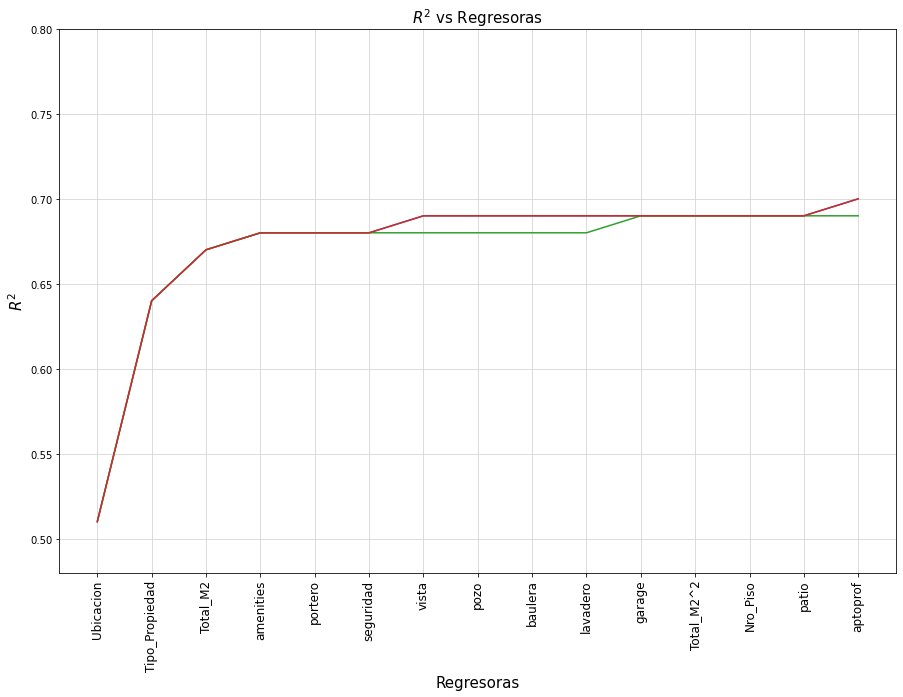

In [8]:
lm = linear_model.LinearRegression()
lm_elastic = linear_model.ElasticNetCV(normalize = True, cv = 4)
lm_ridgecv = linear_model.RidgeCV(normalize = True, cv = 4)
lm_lassocv = linear_model.LassoCV(normalize = True, cv = 4)

columnas_dummies = ['Ubicacion','Tipo_Propiedad']
modelos = [lm,lm_elastic,lm_ridgecv,lm_lassocv]
for modelo in modelos:
    dummies = [] 
    r2 = []
    mae = []
    for i in columnas_dummies:
        dummies.append(i)
        x = pd.get_dummies(data[dummies],drop_first=True) 
        y = data['Precio_M2']
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)
        model  = modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtest)
        r2.append(round(modelo.score(xtrain,ytrain),2))
        mae.append(round(metrics.mean_absolute_error(ytest, ypred)))
        print(str(modelo),dummies)
        print('r2:',round(modelo.score(xtrain,ytrain),2))
        print ('MAE:', round(metrics.mean_absolute_error(ytest, ypred),0))
        print ('MSE:', round(metrics.mean_squared_error(ytest, ypred),0))
        print ('RMSE:', round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),0))
        #print ('Alpha:',model.alpha_)

    columnas_df= ['Total_M2','amenities', 'portero', 'seguridad',  'vista', 'pozo', 
                  'baulera', 'lavadero','garage','Total_M2^2','Nro_Piso','patio','aptoprof']
    columnas = []
    for i in columnas_df:
        columnas.append(i)
        x= pd.concat([pd.get_dummies(data[dummies],drop_first=True),data[columnas]],axis = 1)
        xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)
        model  = modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtest)
        r2.append(round(modelo.score(xtrain,ytrain),2))
        mae.append(round(metrics.mean_absolute_error(ytest, ypred)))
        print(str(modelo),dummies,'y',columnas)
        print('r2:',round(modelo.score(xtrain,ytrain),2))
        print ('MAE:', round(metrics.mean_absolute_error(ytest, ypred),2))
        print ('MSE:', round(metrics.mean_squared_error(ytest, ypred),2))
        print ('RMSE:', round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),2))
        #print ('Alpha:',model.alpha_)

        

total = dummies + columnas
  





In [130]:
lm_lassocv = linear_model.LassoCV(alphas=np.logspace(-5,0, 600),normalize = True, cv = 4)
x= pd.concat([pd.get_dummies(data[dummies],drop_first=True),data[columnas]],axis = 1)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=49)
model  = lm_lassocv.fit(xtrain,ytrain)
ypred = lm_lassocv.predict(xtest)
print('r2:',round(lm_lassocv.score(xtrain,ytrain),2))
print ('MAE:', round(metrics.mean_absolute_error(ytest, ypred),2))
print ('MSE:', round(metrics.mean_squared_error(ytest, ypred),2))
print ('RMSE:', round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),2))
lm_lassocv.alpha_


r2: 0.7
MAE: 383.05
MSE: 263293.92
RMSE: 513.12


0.0004409682748428131

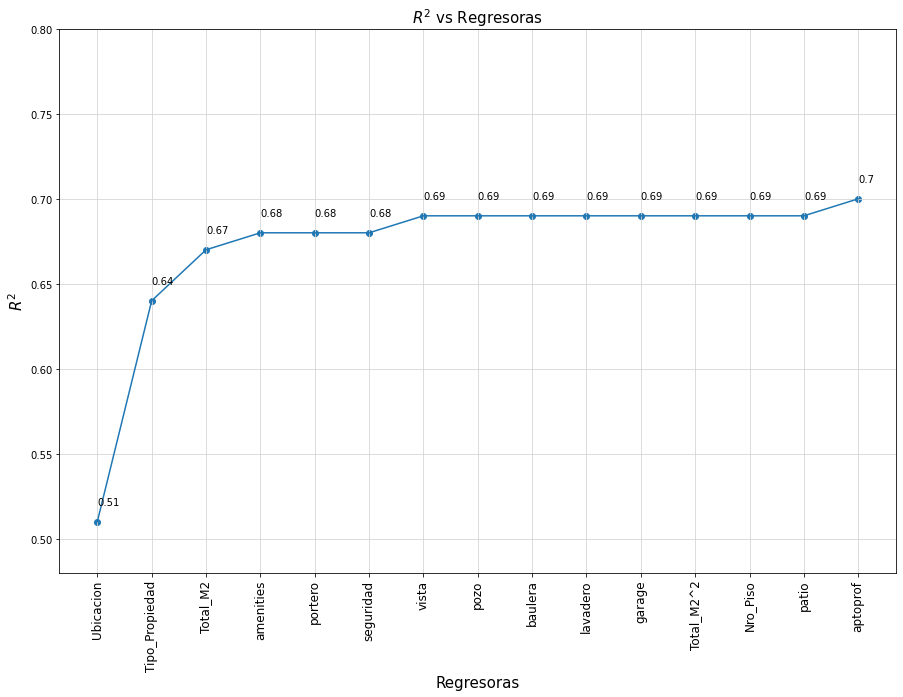

In [9]:
total = dummies + columnas
total


plt.figure(figsize = (15,10))
plt.xticks(rotation=90,fontsize = 12)
plt.xticks(fontsize = 12)
plt.plot(total,r2)
plt.grid(color = '#d4d4d4')
plt.scatter(total,r2)
plt.title(r'$R^2$ vs Regresoras', fontsize = 15)
plt.xlabel('Regresoras',fontsize = 15)
plt.ylabel(r'$R^2$',fontsize = 15)
plt.ylim(min(r2)-0.03, 0.8)

for total , r2_score in enumerate(r2):
    plt.text(total , np.array(r2_score)+0.01,str(r2_score))

#fig, ax1 = plt.subplots(figsize = (15,10))
#plt.xticks(rotation=90)
#plt.grid(color = '#0400de')
#ax1.plot(total,r2,color = '#1c2c4f')

#ax1.set_title(r'$R^2$ vs Regresoras')

#Pongo los total junto a las barras
#for total , r2 in enumerate(r2):
 #   plt.text(total , r2,str(r2))

In [8]:
plt.rcParams.update({'font.size': 12})

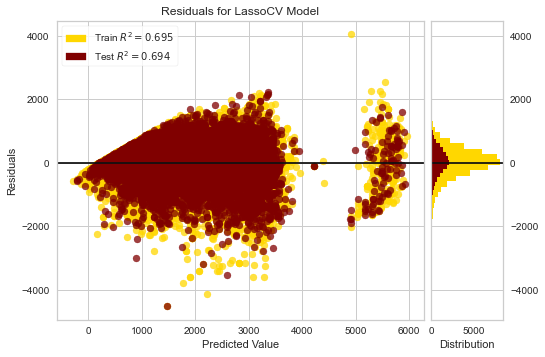

<AxesSubplot:title={'center':'Residuals for LassoCV Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [78]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LassoCV



model = LassoCV(normalize = True, cv = 2)
visualizer = ResidualsPlot(model,hist=True, qqplot=True, train_color="gold", test_color="maroon")

visualizer.fit(xtrain,ytrain)
visualizer.score(xtest, ytest)

visualizer.show()


In [24]:
lm_lassocv.alpha_

0.002188791241069408

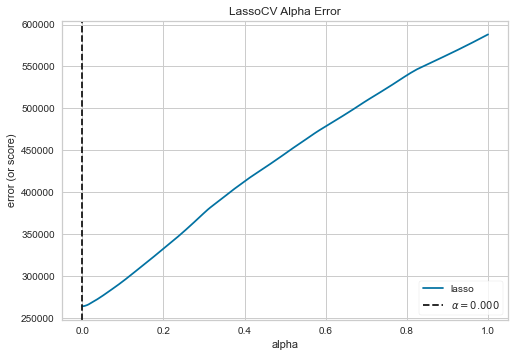

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [131]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-5,0, 600)
model = LassoCV(alphas=alphas , normalize = True, cv = 4)
visualizer = AlphaSelection(model)
visualizer.fit(xtrain,ytrain)
visualizer.show()

In [6]:
data_score = pd.DataFrame(index=['R2','MAE','MSE','RMSE','Alpha'], columns = ['LinearRegression','LassoCV','RidgeCV','ElasticNet'])
data_score

,LinearRegression,LassoCV,RidgeCV,ElasticNet
R2,NaN,NaN,NaN,NaN
MAE,NaN,NaN,NaN,NaN
MSE,NaN,NaN,NaN,NaN
RMSE,NaN,NaN,NaN,NaN
Alpha,NaN,NaN,NaN,NaN


In [42]:
#ENTRENAMIENTO
dummies = ['Ubicacion','Tipo_Propiedad']
columnas= ['Total_M2','amenities', 'portero', 'seguridad',  'vista', 'pozo', 
                  'baulera', 'lavadero','garage','Total_M2^2','Nro_Piso','patio','aptoprof']



alphas = np.logspace(-5,0,600)
cv = 4
lm = linear_model.LinearRegression()
lm_elastic = linear_model.ElasticNetCV(alphas = alphas ,normalize = True, cv = cv)
lm_ridgecv = linear_model.RidgeCV(alphas = alphas , normalize = True, cv = cv)
lm_lassocv = linear_model.LassoCV(alphas= alphas , normalize = True, cv = cv)


modelos = [lm,lm_lassocv,lm_ridgecv,lm_elastic]
x= pd.concat([pd.get_dummies(data[dummies],drop_first=True),data[columnas]],axis = 1)
y = data['Precio_M2']
xtrain , xtest , ytrain , ytest = train_test_split(x,y,random_state=49)

for i , modelo in enumerate(modelos):
    if modelo == lm:
        modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtrain)
        r2 = round(modelo.score(xtrain,ytrain),3)
        MAE = round(metrics.mean_absolute_error(ytrain, ypred),0)
        MSE = round(metrics.mean_squared_error(ytrain, ypred),0)
        RMSE = round(np.sqrt(metrics.mean_squared_error(ytrain, ypred)),0)
        alpha = 0
        data_score.loc[data_score.index,'LinearRegression'] = [r2,MAE,MSE,RMSE,alpha]
    else:
        modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtrain)
        r2 = round(modelo.score(xtrain,ytrain),3)
        MAE = round(metrics.mean_absolute_error(ytrain, ypred),0)
        MSE = round(metrics.mean_squared_error(ytrain, ypred),0)
        RMSE = round(np.sqrt(metrics.mean_squared_error(ytrain, ypred)),0)
        alpha = modelo.alpha_
        data_score.loc[data_score.index,data_score.columns[i]] = [r2,MAE,MSE,RMSE,alpha]
        
        

In [39]:
data_score

,LinearRegression,LassoCV,RidgeCV,ElasticNet
R2,0.7,0.7,0.7,0.67
MAE,380,380,380,393
MSE,261639,261658,261639,279285
RMSE,512,512,512,528
Alpha,0,0.000440968,7.52421e-05,1e-05


In [40]:
#TESTEO
data_score_test = pd.DataFrame(index=['R2','MAE','MSE','RMSE','Alpha'], columns = ['LinearRegression','LassoCV','RidgeCV','ElasticNet'])


dummies = ['Ubicacion','Tipo_Propiedad']
columnas= ['Total_M2','amenities', 'portero', 'seguridad',  'vista', 'pozo', 
                  'baulera', 'lavadero','garage','Total_M2^2','Nro_Piso','patio','aptoprof']



alphas = np.logspace(-5,0,600)
cv = 4
lm = linear_model.LinearRegression()
lm_elastic = linear_model.ElasticNetCV(alphas = alphas ,normalize = True, cv = cv)
lm_ridgecv = linear_model.RidgeCV(alphas = alphas , normalize = True, cv = cv)
lm_lassocv = linear_model.LassoCV(alphas= alphas , normalize = True, cv = cv)


modelos = [lm,lm_lassocv,lm_ridgecv,lm_elastic]
x= pd.concat([pd.get_dummies(data[dummies],drop_first=True),data[columnas]],axis = 1)
y = data['Precio_M2']
xtrain , xtest , ytrain , ytest = train_test_split(x,y,random_state=49)

for i , modelo in enumerate(modelos):
    if modelo == lm:
        modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtest)
        r2 = round(modelo.score(xtest,ytest),3)
        MAE = round(metrics.mean_absolute_error(ytest, ypred),0)
        MSE = round(metrics.mean_squared_error(ytest, ypred),0)
        RMSE = round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),0)
        alpha = 0
        data_score_test.loc[data_score.index,data_score.columns[i]] = [r2,MAE,MSE,RMSE,alpha]
    else:
        modelo.fit(xtrain,ytrain)
        ypred = modelo.predict(xtest)
        r2 = round(modelo.score(xtest,ytest),3)
        MAE = round(metrics.mean_absolute_error(ytest, ypred),0)
        MSE = round(metrics.mean_squared_error(ytest, ypred),0)
        RMSE = round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),0)
        alpha = modelo.alpha_
        data_score_test.loc[data_score.index,data_score.columns[i]] = [r2,MAE,MSE,RMSE,alpha]
        
        

C:\Users\iory2\.conda\envs\dhdsblend\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


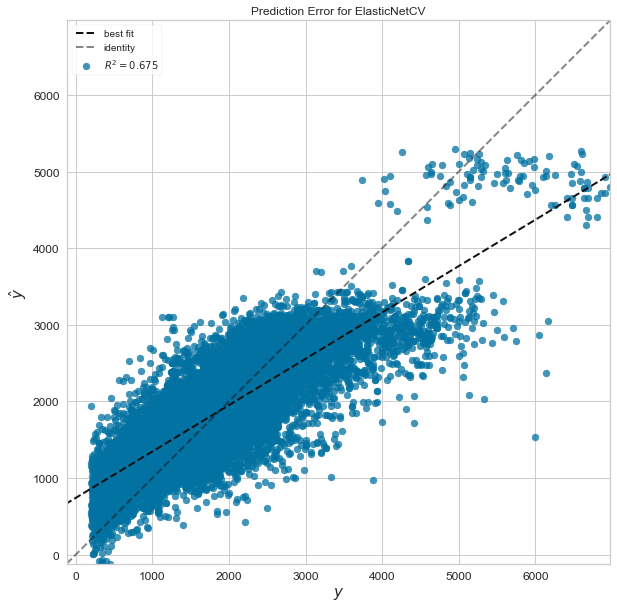

<AxesSubplot:title={'center':'Prediction Error for ElasticNetCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [63]:
from yellowbrick.features import RadViz
from yellowbrick.regressor import PredictionError
#visualizer = RadViz(size=(1080, 720))
#fig, ax = plt.subplots(figsize=(15,15))
#ax.set_xlabel('xlabel',fontsize = 20)
#ax.set_ylabel('xlabel',fontsize = 20)
#ax.set_title('asd',fontsize = 40)
fig = plt.figure(figsize=(15,10))
visualizer = PredictionError(lm_elastic)
visualizer.fit(xtrain,ytrain)
visualizer.score(xtest, ytest)
visualizer.ax.set_xlabel('xlabel',fontsize = 15)
visualizer.ax.set_ylabel('xlabel',fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
visualizer.show() 

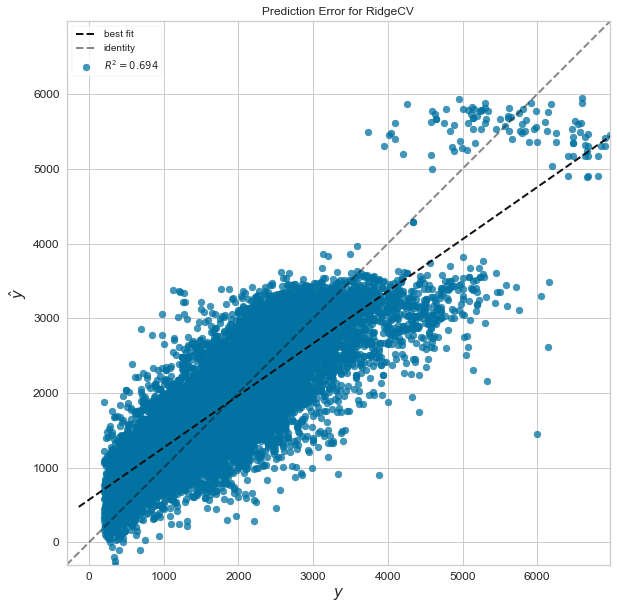

<AxesSubplot:title={'center':'Prediction Error for RidgeCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [73]:
from yellowbrick.features import RadViz
from yellowbrick.regressor import PredictionError
#visualizer = RadViz(size=(1080, 720))
#fig, ax = plt.subplots(figsize=(15,15))
#ax.set_xlabel('xlabel',fontsize = 20)
#ax.set_ylabel('xlabel',fontsize = 20)
#ax.set_title('asd',fontsize = 40)
fig = plt.figure(figsize=(15,10))
visualizer = PredictionError(lm_ridgecv)

visualizer.fit(xtrain,ytrain)
visualizer.score(xtest, ytest)
visualizer.ax.set_xlabel('xlabel',fontsize = 15)
visualizer.ax.set_ylabel('xlabel',fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
visualizer.show() 


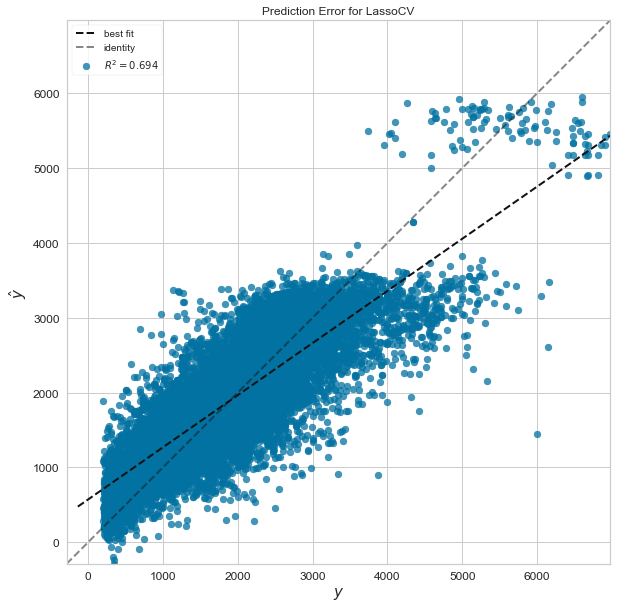

<AxesSubplot:title={'center':'Prediction Error for LassoCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [76]:
from yellowbrick.features import RadViz
from yellowbrick.regressor import PredictionError
#visualizer = RadViz(size=(1080, 720))
#fig, ax = plt.subplots(figsize=(15,15))
#ax.set_xlabel('xlabel',fontsize = 20)
#ax.set_ylabel('xlabel',fontsize = 20)
#ax.set_title('asd',fontsize = 40)
fig = plt.figure(figsize=(15,10))
visualizer = PredictionError(lm_lassocv,hist=False, qqplot=True,train_color="gold", test_color="maroon")

visualizer.fit(xtrain,ytrain)
visualizer.score(xtest, ytest)
visualizer.ax.set_xlabel('xlabel',fontsize = 15)
visualizer.ax.set_ylabel('xlabel',fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
visualizer.show() 


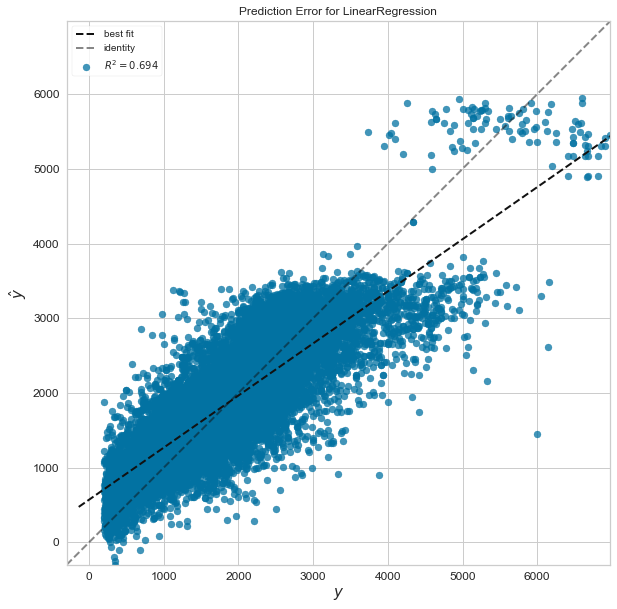

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [84]:
from yellowbrick.features import RadViz
from yellowbrick.regressor import PredictionError
#visualizer = RadViz(size=(1080, 720))
#fig, ax = plt.subplots(figsize=(15,15))
#ax.set_xlabel('xlabel',fontsize = 20)
#ax.set_ylabel('xlabel',fontsize = 20)
#ax.set_title('asd',fontsize = 40)
fig = plt.figure(figsize=(15,10))
visualizer = PredictionError(lm)

visualizer.fit(xtrain,ytrain)
visualizer.score(xtest, ytest)
visualizer.ax.set_xlabel('xlabel',fontsize = 15)
visualizer.ax.set_ylabel('xlabel',fontsize = 15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
visualizer.show() 

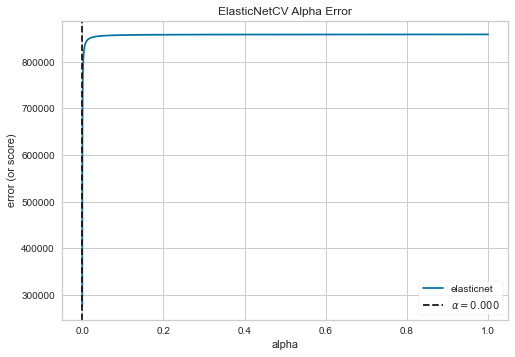

<AxesSubplot:title={'center':'ElasticNetCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [86]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

alphas = np.logspace(-5,0, 600)
model = LassoCV(alphas=alphas , normalize = True, cv = 4)
visualizer = AlphaSelection(lm_elastic)
visualizer.fit(xtrain,ytrain)
visualizer.show()

In [99]:
from sklearn.linear_model import RidgeCV
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection

#alphas = np.logspace(-5,0, 600)
#model = LassoCV(alphas=alphas , normalize = True, cv = 4)
visualizer = AlphaSelection(RidgeCV(alphas=np.logspace(-5,0, 600),normalize=True,cv =5))
visualizer.fit(xtrain,ytrain)
visualizer.show()

ValueError: cv!=None and store_cv_values=True  are incompatible

In [110]:

modelo = linear_model.RidgeCV(alphas=i , normalize = True, cv = 4,scoring = 'r2')
modelo.fit(xtrain,ytrain)
ypred = modelo.predict(xtest)
r2 = round(modelo.score(xtest,ytest),3)
MAE = round(metrics.mean_absolute_error(ytest, ypred),0)
MSE = round(metrics.mean_squared_error(ytest, ypred),0)
RMSE = round(np.sqrt(metrics.mean_squared_error(ytest, ypred)),0)
r2.append(round(modelo.score(xtest,ytest),3))


TypeError: len() of unsized object

In [111]:
alphas_modelo =modelo.alphas
alphas_modelo

array(1.e-05)

<AxesSubplot:xlabel='Precio_M2'>

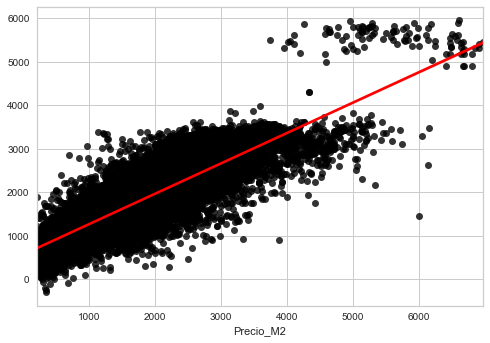

In [115]:
sns.regplot(x=ytest,y=ypred,scatter_kws={"color": "black"}, line_kws={"color": "red"})

<AxesSubplot:xlabel='Precio_M2', ylabel='Precio_M2'>

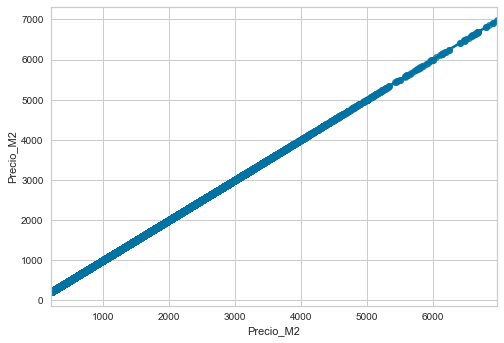

In [118]:
sns.regplot(x=ytest,y=ytest)

<AxesSubplot:xlabel='Precio_M2', ylabel='Precio_M2'>

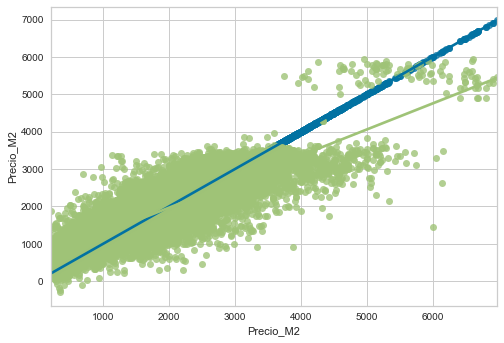

In [129]:
fig, ax1 = plt.subplots(ncols=1)
sns.regplot(x=ytest,y=ytest,ax=ax1)
sns.regplot(x=ytest,y=ypred,ax=ax1)

In [121]:
sns.regplot(x=ytest,y=ypred,scatter_kws={"color": "black"}, line_kws={"color": "red"},ax=ax1)


AttributeError: module 'seaborn' has no attribute 'show'